In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [3]:
acciones=pd.read_csv('acciones_2019.csv')
acciones.head(2)

,Precio de Cierre,WALMEX_*,GFNORTE_O,ALFA_A,ALPEK_A,ALSEA_*,AMX_L,ASUR_B,FEMSA_UBD,GMEXICO_B,...,IENOVA_*,GRUMA_B,ASUR_B.1,PINFRA_*,CREAL_*,AEROMEX_*,TRAXION_A,ALEATIC_*,AXTEL_CPO,NEMAK_A
0,1/2/2019,49.72,98.22,23.31,24.54,51.30,14.40,306.15,170.80,41.01,...,72.02,221.55,306.15,187.08,17.81,22.53,11.75,25.10,2.99,14.95
1,1/3/2019,48.75,96.64,23.32,24.35,52.25,14.27,301.50,172.91,40.81,...,72.98,222.01,301.50,189.01,17.75,22.77,11.59,24.66,2.98,14.87


In [4]:
acciones['Precio de Cierre'] =pd.to_datetime(acciones['Precio de Cierre'])
acciones = acciones.rename(columns={'Precio de Cierre': 'Fecha'})
acciones.set_index('Fecha', inplace=True)
acciones=acciones.pct_change()
acciones.dropna(inplace=True)
acciones.head(2)


,WALMEX_*,GFNORTE_O,ALFA_A,ALPEK_A,ALSEA_*,AMX_L,ASUR_B,FEMSA_UBD,GMEXICO_B,FUNO_11,IENOVA_*,GRUMA_B,ASUR_B.1,PINFRA_*,CREAL_*,AEROMEX_*,TRAXION_A,ALEATIC_*,AXTEL_CPO,NEMAK_A
Fecha,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.019509,-0.016086,0.000429,-0.007742,0.018519,-0.009028,-0.015189,0.012354,-0.004877,0.028231,0.013330,0.002076,-0.015189,0.010316,-0.003369,0.010652,-0.013617,-0.017530,-0.003344,-0.005351
2019-01-04,0.018667,-0.011279,0.018439,0.018480,0.008230,0.003504,0.030945,0.003181,0.059054,-0.021021,0.068786,0.004414,0.030945,0.033384,0.028169,0.017128,-0.013805,-0.016626,0.000000,0.012105


In [5]:
df = acciones*252
mean = df.mean()
cov = df.cov()
print(mean)
print(cov)

WALMEX_*     0.114354
GFNORTE_O    0.122331
ALFA_A      -0.358534
ALPEK_A     -0.135415
ALSEA_*      0.005564
AMX_L        0.074025
ASUR_B       0.173208
FEMSA_UBD    0.058282
GMEXICO_B    0.282933
FUNO_11      0.290881
IENOVA_*     0.249509
GRUMA_B     -0.114768
ASUR_B.1     0.173208
PINFRA_*     0.057706
CREAL_*      0.342859
AEROMEX_*   -0.324694
TRAXION_A    0.292179
ALEATIC_*    0.174177
AXTEL_CPO    0.068811
NEMAK_A     -0.585406
dtype: float64
            WALMEX_*  GFNORTE_O     ALFA_A    ALPEK_A    ALSEA_*      AMX_L  \
WALMEX_*   14.368880   3.731272   3.748531   2.488933   1.936850   3.929638   
GFNORTE_O   3.731272  24.531955   6.956152   4.781334   2.288665   5.471703   
ALFA_A      3.748531   6.956152  20.506286   4.038330   3.470048   5.859769   
ALPEK_A     2.488933   4.781334   4.038330  13.606588   2.952354   3.315535   
ALSEA_*     1.936850   2.288665   3.470048   2.952354  17.755923   1.835059   
AMX_L       3.929638   5.471703   5.859769   3.315535   1.835059  13.27

In [6]:
stocks=df.columns

In [7]:
def random_portfolio(n):
    weights = np.random.uniform(size=n)
    for i in range(1,20):
        weights[i]*=np.prod(1-weights[0:i-1])
    return weights/weights.sum()
random_portfolio(20)

array([0.26372144, 0.04395859, 0.07310069, 0.1028718 , 0.09548971,
       0.05540666, 0.03589593, 0.00212695, 0.07198108, 0.01145323,
       0.0604742 , 0.00284677, 0.03183966, 0.04767912, 0.0451884 ,
       0.01442715, 0.00505312, 0.01864859, 0.01188659, 0.00595032])

In [8]:
def get_portfolio_stats(port, mean, var_cov):
    port_mean = (port*mean).sum()
    port_sd = port@var_cov@port
    return [port_mean, port_sd]
get_portfolio_stats([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],mean, cov)

[0.11435359565178982, 14.368879826424616]

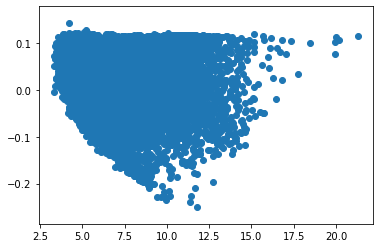

In [9]:
vportfolio = []
vreward = []
vrisk = []

for _ in range(20000):
    vportfolio.append(random_portfolio(20))
    reward, risk = get_portfolio_stats(vportfolio[-1], mean, cov)
    vreward.append(reward)
    vrisk.append(risk)
    
plt.scatter(vrisk, vreward)

In [10]:
def Markowitz_target(port, q, mean , cov):
    return port@cov@port - q*mean@port + abs(sum(port)-1)+sum(np.array(port)<0)
Markowitz_target([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 0.2, mean,cov)

x = scipy.optimize.minimize(Markowitz_target, [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], args=(0.2,mean,cov))
x

      fun: 1.8840950592501953
 hess_inv: array([[ 4.30805245e-02, -2.53783392e-03, -2.06456531e-03,
        -3.33372737e-03, -1.46067094e-03, -6.95221028e-03,
         4.89460808e-04,  2.54003279e-03, -5.14101063e-03,
        -1.87267780e-03, -2.01846065e-04, -6.40045543e-03,
         4.89405559e-04,  5.16896362e-03,  8.60183821e-04,
        -4.12773352e-03,  3.90904366e-03, -2.15415571e-03,
         1.03523823e-03, -4.48468878e-04],
       [-2.53783392e-03,  2.66660077e-02, -3.23044631e-03,
        -3.77449574e-03,  1.05654258e-03, -2.80120605e-03,
        -1.45920126e-03, -1.48456871e-03, -2.02094706e-04,
        -3.63632410e-03, -1.53990524e-03, -2.66265003e-03,
        -1.45927348e-03, -1.29685368e-03, -3.05303045e-03,
        -2.06438987e-04, -3.32296029e-03,  2.32041271e-03,
        -2.17105214e-03, -7.83160729e-04],
       [-2.06456531e-03, -3.23044631e-03,  3.65936033e-02,
        -8.33075216e-04, -1.47242780e-03, -4.80331155e-03,
        -3.75773741e-03, -1.95891387e-03, -6.04

In [11]:
shido=np.where(np.array(vrisk)==min(vrisk))
chido=shido[0][0]

Index(['WALMEX_*', 'GFNORTE_O', 'ALFA_A', 'ALPEK_A', 'ALSEA_*', 'AMX_L',
       'ASUR_B', 'FEMSA_UBD', 'GMEXICO_B', 'FUNO_11', 'IENOVA_*', 'GRUMA_B',
       'ASUR_B.1', 'PINFRA_*', 'CREAL_*', 'AEROMEX_*', 'TRAXION_A',
       'ALEATIC_*', 'AXTEL_CPO', 'NEMAK_A'],
      dtype='object')
[0.14133358 0.01093191 0.00931711 0.19570008 0.0575545  0.10468447
 0.00371866 0.01851706 0.01037773 0.02780274 0.04100116 0.07933401
 0.0070443  0.04409802 0.00047105 0.06374907 0.07013567 0.02930126
 0.04121823 0.04370941]


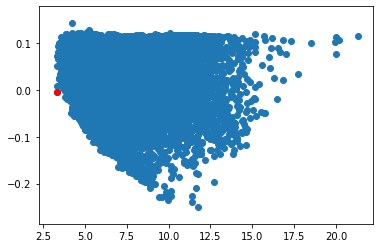

In [12]:

np.argmin(vrisk)
print(stocks)
print(vportfolio[chido])

plt.scatter(vrisk, vreward)
plt.scatter(vrisk[chido] ,vreward[chido],color="r")